In [15]:
%matplotlib inline

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt

Some data processing for the monitoring to calculate the average of various system parameters

In [13]:
folder_path = "S:\QRAM\qram_4QR2\data\monitoring"
filenames = ["monitoring_241218", "monitoring_241219"]

data_dict = [dict(), dict(), dict(), dict()]
for file_path in filenames:
    for q in range(4):
        filepath = os.path.join(folder_path, file_path, f'qubit_{q}_data.npz')
        print(filepath)
        with np.load(filepath) as npzfile:
            for key in npzfile.keys():
                # print(key)
                if key in data_dict:
                    data_dict[q][key] = np.concatenate((data_dict[key], npzfile[key]))
                else:
                    data_dict[q].update({key:npzfile[key]})
print(data_dict[0].keys())

S:\QRAM\qram_4QR2\data\monitoring\monitoring_241218\qubit_0_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241218\qubit_1_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241218\qubit_2_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241218\qubit_3_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241219\qubit_0_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241219\qubit_1_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241219\qubit_2_data.npz
S:\QRAM\qram_4QR2\data\monitoring\monitoring_241219\qubit_3_data.npz
dict_keys(['t2_ge', 't2_ge_err', 'freq_ge', 'freq_ge_err', 'time_t2_ge', 't1_ge', 't1_ge_err', 'time_t1_ge', 'temp', 'time_temp'])


Qubit 0 t1_ge avg = 59.54 +/- 8.10 us
Qubit 1 t1_ge avg = 91.04 +/- 17.97 us
Qubit 2 t1_ge avg = 52.32 +/- 15.51 us
Qubit 3 t1_ge avg = 58.63 +/- 6.01 us


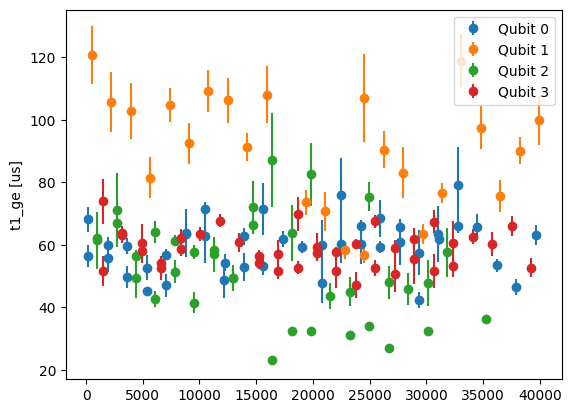

In [49]:
data_name = "t1_ge"
plt.figure()
for q in range(4):
    mask = data_dict[q][data_name] > 0
    # print(np.sum(mask))

    mask = mask & (data_dict[q][f"{data_name}_err"] < 0.2 * data_dict[q][f"{data_name}"]) # discard on error bars
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    mask = mask & (np.abs(data_dict[q][f"{data_name}"] - avg) < 2*std) # discard outliers
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    # print(data_dict[q][data_name][mask])
    print(f"Qubit {q} {data_name} avg = {avg:.2f} +/- {std:.2f} us")
    plt.errorbar(data_dict[q][f"time_{data_name}"][mask], data_dict[q][data_name][mask], yerr=data_dict[q][f"{data_name}_err"][mask], fmt='o', label=f'Qubit {q}')
plt.ylabel(f"{data_name} [us]")
plt.legend()
plt.show()

Qubit 0 t2_ge avg = 31.67 +/- 0.94 us
Qubit 1 t2_ge avg = 54.92 +/- 14.73 us
Qubit 2 t2_ge avg = 57.66 +/- 16.81 us
Qubit 3 t2_ge avg = 48.65 +/- 3.40 us


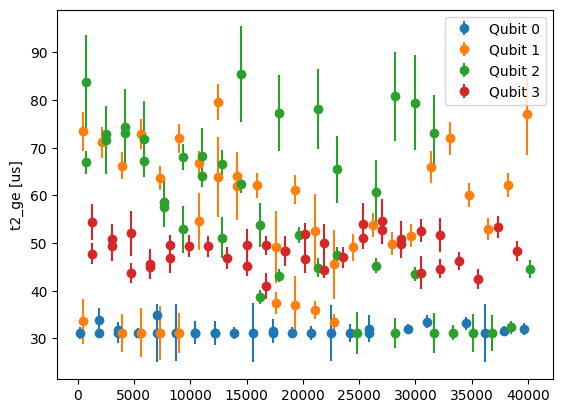

In [50]:
data_name = "t2_ge"
plt.figure()
for q in range(4):
    mask = data_dict[q][data_name] > 0
    # print(np.sum(mask))

    mask = mask & (data_dict[q][f"{data_name}_err"] < 0.2 * data_dict[q][f"{data_name}"]) # discard on error bars
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    mask = mask & (np.abs(data_dict[q][f"{data_name}"] - avg) < 2*std) # discard outliers
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    # print(data_dict[q][data_name][mask])
    print(f"Qubit {q} {data_name} avg = {avg:.2f} +/- {std:.2f} us")
    plt.errorbar(data_dict[q][f"time_{data_name}"][mask], data_dict[q][data_name][mask], yerr=data_dict[q][f"{data_name}_err"][mask], fmt='o', label=f'Qubit {q}')
plt.ylabel(f"{data_name} [us]")
plt.legend()
plt.show()

Qubit 2 t1_ef avg = 28.25 +/- 3.61 us
Qubit 3 t1_ef avg = 24.54 +/- 3.39 us


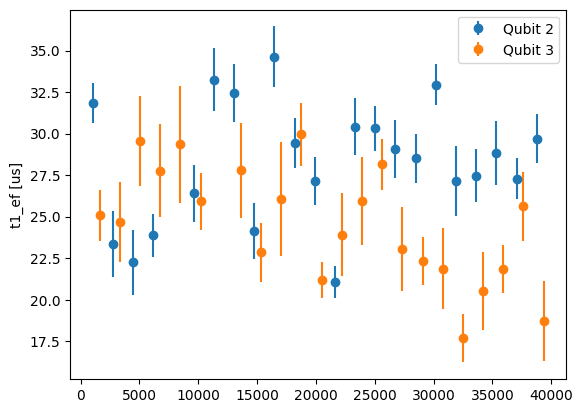

In [51]:
data_name = "t1_ef"
plt.figure()
for q in [2, 3]:
    mask = data_dict[q][data_name] > 0
    # print(np.sum(mask))

    mask = mask & (data_dict[q][f"{data_name}_err"] < 0.2 * data_dict[q][f"{data_name}"]) # discard on error bars
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    mask = mask & (np.abs(data_dict[q][f"{data_name}"] - avg) < 2*std) # discard outliers
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    # print(data_dict[q][data_name][mask])
    print(f"Qubit {q} {data_name} avg = {avg:.2f} +/- {std:.2f} us")
    plt.errorbar(data_dict[q][f"time_{data_name}"][mask], data_dict[q][data_name][mask], yerr=data_dict[q][f"{data_name}_err"][mask], fmt='o', label=f'Qubit {q}')
plt.ylabel(f"{data_name} [us]")
plt.legend()
plt.show()

Qubit 2 t2_ef avg = 23.79 +/- 5.61 us
Qubit 3 t2_ef avg = 16.76 +/- 1.40 us


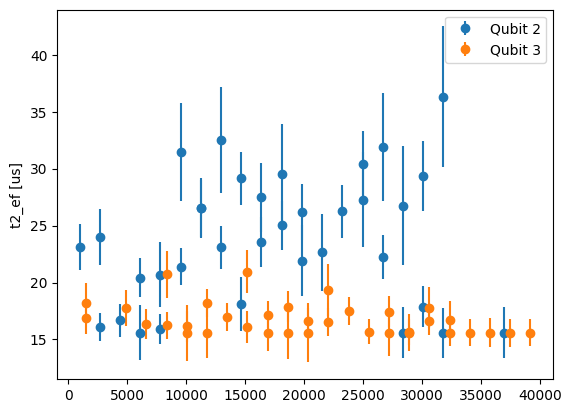

In [52]:
data_name = "t2_ef"
plt.figure()
for q in [2, 3]:
    mask = data_dict[q][data_name] > 0
    # print(np.sum(mask))

    mask = mask & (data_dict[q][f"{data_name}_err"] < 0.2 * data_dict[q][f"{data_name}"]) # discard on error bars
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    mask = mask & (np.abs(data_dict[q][f"{data_name}"] - avg) < 2*std) # discard outliers
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    # print(data_dict[q][data_name][mask])
    print(f"Qubit {q} {data_name} avg = {avg:.2f} +/- {std:.2f} us")
    plt.errorbar(data_dict[q][f"time_{data_name}"][mask], data_dict[q][data_name][mask], yerr=data_dict[q][f"{data_name}_err"][mask], fmt='o', label=f'Qubit {q}')
plt.ylabel(f"{data_name} [us]")
plt.legend()
plt.show()

Qubit 0 temp avg = 89.07 +/- 29.80 mK
Qubit 1 temp avg = 93.32 +/- 52.56 mK
Qubit 2 temp avg = 102.32 +/- 55.99 mK
Qubit 3 temp avg = 87.10 +/- 17.66 mK


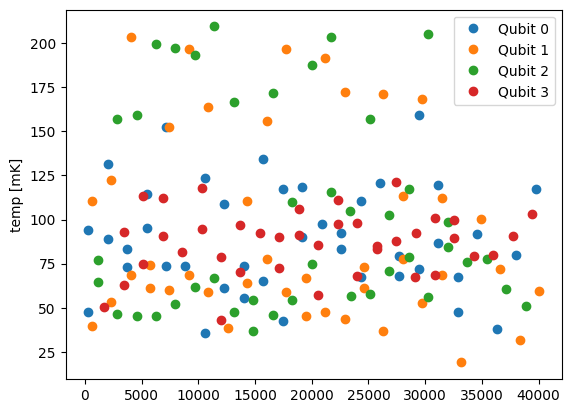

In [57]:
data_name = "temp"
plt.figure()
for q in range(4):
    mask = data_dict[q][data_name] > 0
    # print(np.sum(mask))

    # mask = mask & (data_dict[q][f"{data_name}_err"] < 0.2 * data_dict[q][f"{data_name}"]) # discard on error bars
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    mask = mask & (np.abs(data_dict[q][f"{data_name}"] - avg) < 2*std) # discard outliers
    # print(np.sum(mask))

    avg = np.mean(data_dict[q][data_name][mask])
    std = np.std(data_dict[q][data_name][mask])
    # print(data_dict[q][data_name][mask])
    print(f"Qubit {q} {data_name} avg = {avg:.2f} +/- {std:.2f} mK")
    plt.plot(data_dict[q][f"time_{data_name}"][mask], data_dict[q][data_name][mask], 'o', label=f'Qubit {q}')
plt.ylabel(f"{data_name} [mK]")
plt.legend()
plt.show()